## Imoprting Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

import json

## Importing .Json dataset and converting it into readable pandas dataframe

In [2]:
with open('data.json') as f:
    data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)

In [3]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Recovered,1,0,0,4,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 42 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   an       1338 non-null   object
 1   ap       1338 non-null   object
 2   ar       1338 non-null   object
 3   as       1338 non-null   object
 4   br       1338 non-null   object
 5   ch       1338 non-null   object
 6   ct       1338 non-null   object
 7   date     1338 non-null   object
 8   dateymd  1338 non-null   object
 9   dd       1338 non-null   object
 10  dl       1338 non-null   object
 11  dn       1338 non-null   object
 12  ga       1338 non-null   object
 13  gj       1338 non-null   object
 14  hp       1338 non-null   object
 15  hr       1338 non-null   object
 16  jh       1338 non-null   object
 17  jk       1338 non-null   object
 18  ka       1338 non-null   object
 19  kl       1338 non-null   object
 20  la       1338 non-null   object
 21  ld       1338 non-null   object
 22  

### For simplicty and better understanding, considering the data on date 2nd June 2021

In [5]:
df1 = df.tail(3)
df1.drop(['dateymd','date'], axis= 1, inplace=True)
df1.set_index('status', inplace=True)
df1 = df1.apply(pd.to_numeric)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
df1 = df1.T
df1.drop('tt', inplace= True)
df1.head()

status,Confirmed,Recovered,Deceased
an,25,36,1
ap,12768,15612,98
ar,376,329,2
as,4178,4389,61
br,1158,2772,46


## Bar Plots

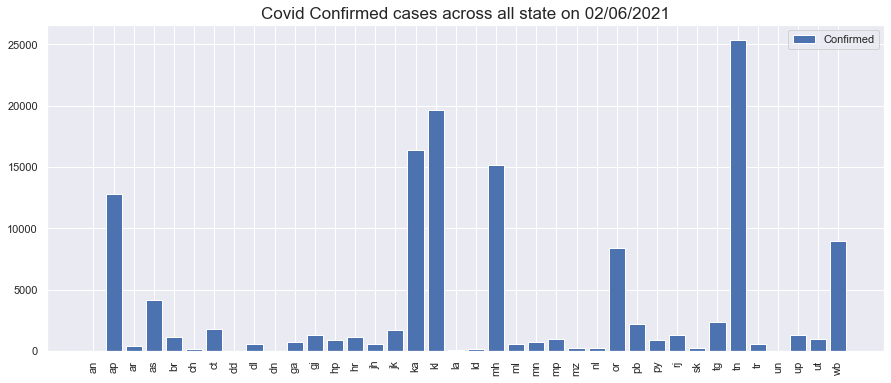

In [7]:
fig = plt.gcf();
fig.set_size_inches(15,6);
plt.bar(df1.index, df1.Confirmed, label= 'Confirmed');
plt.xticks(rotation=90);
plt.title("Covid Confirmed cases across all state on 02/06/2021", fontsize= 17);
plt.legend();

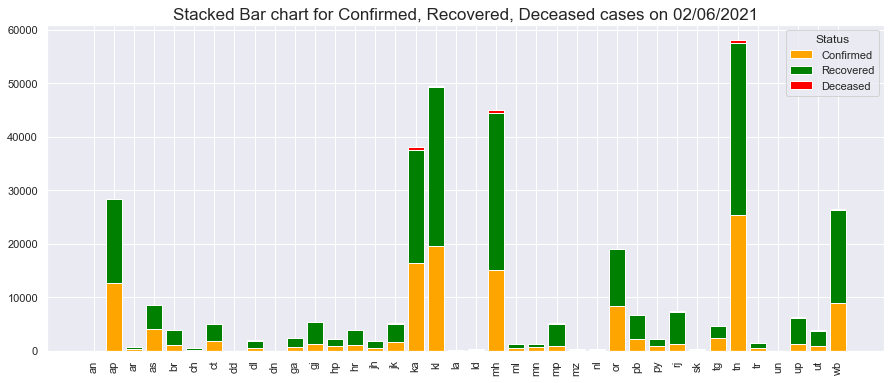

In [8]:
fig = plt.gcf();
fig.set_size_inches(15,6);
plt.bar(df1.index, df1.Confirmed, color= "Orange");
plt.bar(df1.index, df1.Recovered, bottom= df1.Confirmed, color= "Green");
plt.bar(df1.index, df1.Deceased, bottom= df1.Confirmed + df1.Recovered, color= "red");
plt.xticks(rotation=90);
plt.legend(title= "Status", labels= ["Confirmed", "Recovered", "Deceased"]);
plt.title("Stacked Bar chart for Confirmed, Recovered, Deceased cases on 02/06/2021", fontsize= 17);

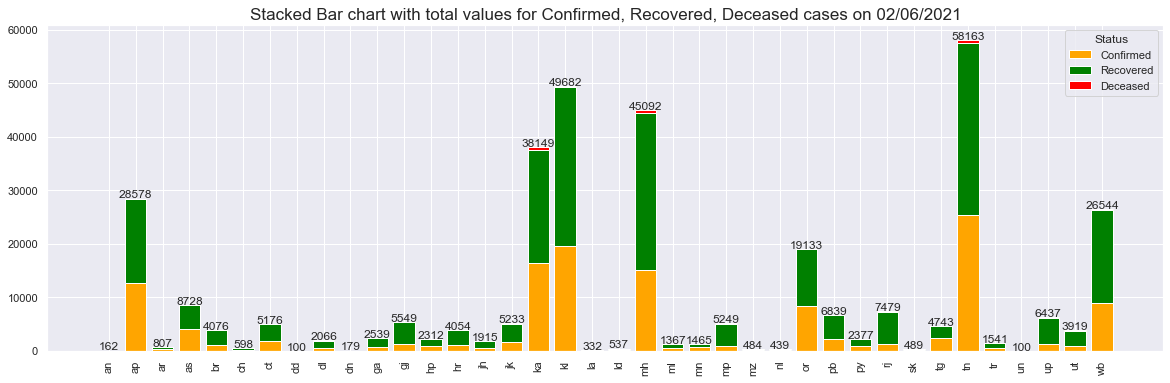

In [9]:
fig = plt.gcf();
fig.set_size_inches(20,6);
plt.bar(df1.index, df1.Confirmed, color= "Orange");
plt.bar(df1.index, df1.Recovered, bottom= df1.Confirmed, color= "Green");
plt.bar(df1.index, df1.Deceased, bottom= df1.Confirmed + df1.Recovered, color= "red");
plt.xticks(rotation=90);
plt.legend(title= "Status", labels= ["Confirmed", "Recovered", "Deceased"]);
plt.title("Stacked Bar chart with total values for Confirmed, Recovered, Deceased cases on 02/06/2021", fontsize= 17);

for i, val in enumerate(df1.index):
    y = df1.loc[val].sum() + 100
    x = i
    plt.text(x, y, str(y), ha="center");

## Relative Stacked bar plots

In [10]:
df1.head()

status,Confirmed,Recovered,Deceased
an,25,36,1
ap,12768,15612,98
ar,376,329,2
as,4178,4389,61
br,1158,2772,46


In [11]:
df1["Total"] = 0

In [12]:
df1["Total"] = df1.sum(axis=1)

In [13]:
df1.head()

status,Confirmed,Recovered,Deceased,Total
an,25,36,1,62
ap,12768,15612,98,28478
ar,376,329,2,707
as,4178,4389,61,8628
br,1158,2772,46,3976


In [14]:
df1['Confirmed_Fraction'] = df1['Confirmed'] / df1['Total']
df1['Recovered_Fraction'] = df1['Recovered'] / df1['Total']
df1['Deceased_Fraction'] = df1['Deceased'] / df1['Total']

In [15]:
df1.head()

status,Confirmed,Recovered,Deceased,Total,Confirmed_Fraction,Recovered_Fraction,Deceased_Fraction
an,25,36,1,62,0.403226,0.580645,0.016129
ap,12768,15612,98,28478,0.448346,0.548213,0.003441
ar,376,329,2,707,0.531825,0.465347,0.002829
as,4178,4389,61,8628,0.484237,0.508693,0.007070
br,1158,2772,46,3976,0.291247,0.697183,0.011569


In [16]:
df1 = df1.sort_values('Confirmed_Fraction', ascending=False)

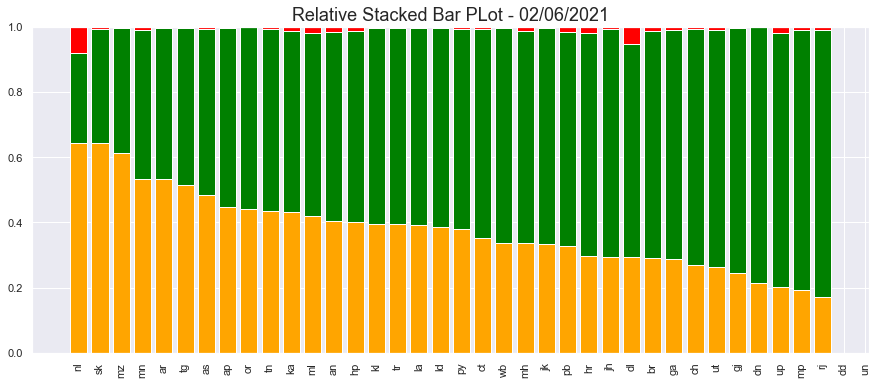

In [17]:
fig = plt.gcf();
fig.set_size_inches(15,6);
plt.bar(df1.index, df1.Confirmed_Fraction, color= "Orange");
plt.bar(df1.index, df1.Recovered_Fraction, bottom= df1.Confirmed_Fraction, color= "Green");
plt.bar(df1.index, df1.Deceased_Fraction, bottom= df1.Confirmed_Fraction + df1.Recovered_Fraction, color= "red");
plt.xticks(rotation=90);
plt.title("Relative Stacked Bar PLot - 02/06/2021", fontsize= 18);

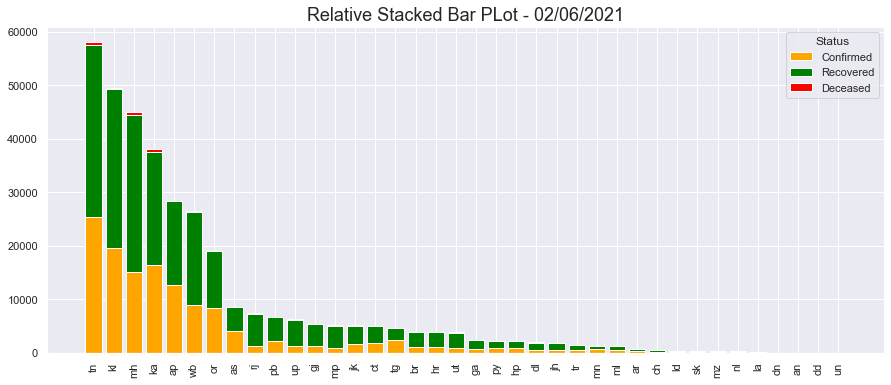

In [18]:
df1 = df1.sort_values('Total', ascending=False)

fig = plt.gcf();
fig.set_size_inches(15,6);
plt.bar(df1.index, df1.Confirmed, color= "Orange");
plt.bar(df1.index, df1.Recovered, bottom= df1.Confirmed, color= "Green");
plt.bar(df1.index, df1.Deceased, bottom= df1.Confirmed + df1.Recovered, color= "red");
plt.xticks(rotation=90);
plt.legend(title= "Status", labels= ["Confirmed", "Recovered", "Deceased"]);
plt.title("Relative Stacked Bar PLot - 02/06/2021", fontsize= 18);

## Time-Varying composition of data

### Stacked area plots

In [19]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Recovered,1,0,0,4,0,0,0,0


In [20]:
# Looking at Maharashtra state status only for time being.
df_ = df[['mh', 'date', 'status']]
df_.head()

,mh,date,status
0,14,14-Mar-20,Confirmed
1,0,14-Mar-20,Recovered
2,0,14-Mar-20,Deceased
3,18,15-Mar-20,Confirmed
4,0,15-Mar-20,Recovered


In [21]:
df_['mh'] = pd.to_numeric(df_['mh'])
df_['date'] = pd.to_datetime(df_['date'])

<ipython-input-21-47907b684543>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['mh'] = pd.to_numeric(df_['mh'])
<ipython-input-21-47907b684543>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['date'] = pd.to_datetime(df_['date'])


*Pivoting the df_ so as to get in format-* <br>
date | confirmed | recoverd | deceased | <br>
2020-03-14 | 14 | 0 | 0 <br>
2020-03-15 | 18 | 0 | 0 <br>

In [22]:
df_ = df_.pivot_table(values="mh", columns= "status", index="date")
df_.head()

status,Confirmed,Deceased,Recovered
date,,,
2020-03-14,14,0,0
2020-03-15,18,0,0
2020-03-16,6,0,0
2020-03-17,3,1,0
2020-03-18,3,0,0


In [23]:
df_['Confirmed'] = abs(df_['Confirmed'])
df_['Deceased'] = abs(df_['Deceased'])
df_['Recovered'] = abs(df_['Recovered'])

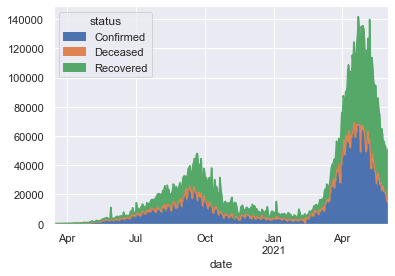

In [24]:
df_.plot.area();

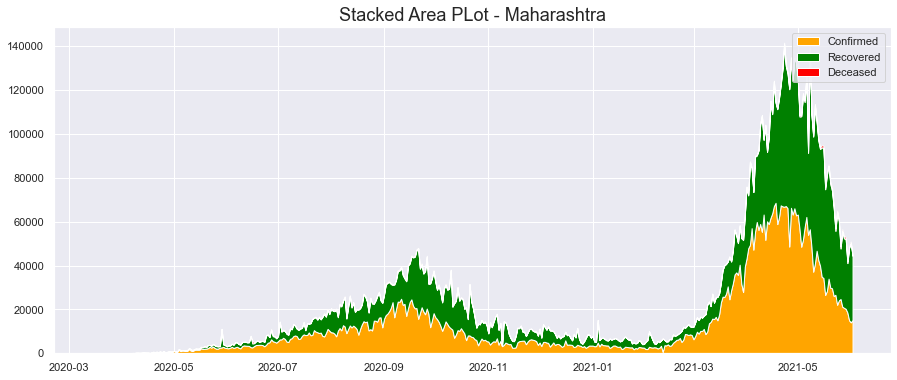

In [25]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased,
              labels=['Confirmed', 'Recovered', 'Deceased'],
              colors=['orange', 'green', 'red']);
plt.legend();
plt.title("Stacked Area PLot - Maharashtra", fontsize= 18);

## Relative stacked area plot

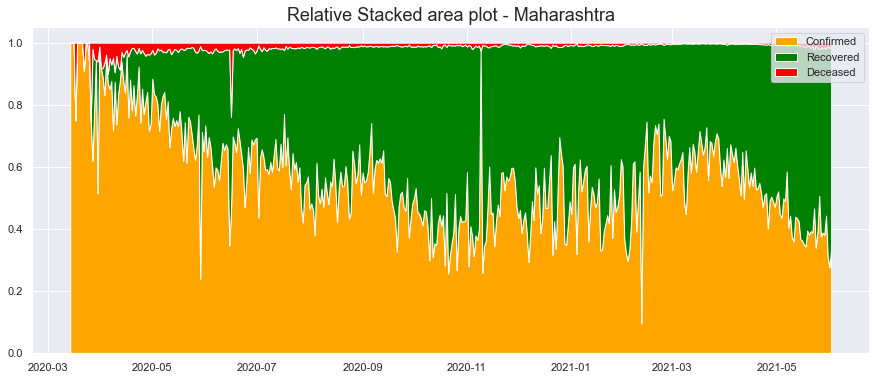

In [26]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
plt.stackplot(df_.index, df_.Confirmed/df_.sum(axis=1), 
              df_.Recovered/df_.sum(axis=1), 
              df_.Deceased/df_.sum(axis=1),
              labels=['Confirmed', 'Recovered', 'Deceased'],
              colors=['orange', 'green', 'red']);
plt.legend();
plt.title("Relative Stacked area plot - Maharashtra", fontsize= 18);

In [27]:
def plot_stacked_area_by_state(state):
    df_ = df[[state, 'date', 'status']]
    df_[state] = pd.to_numeric(df_[state])
    df_['date'] = pd.to_datetime(df_['date'])
    df_ = df_.pivot_table(values=state, columns="status", index="date")
    fig = plt.gcf();
    fig.set_size_inches(15, 6);
    plt.stackplot(df_.index, df_.Confirmed/df_.sum(axis=1), 
                df_.Recovered/df_.sum(axis=1), 
                df_.Deceased/df_.sum(axis=1),
                labels=['Confirmed', 'Recovered', 'Deceased'],
                colors=['orange', 'green', 'red']);
    plt.legend();

<ipython-input-27-a8092060fed3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_[state] = pd.to_numeric(df_[state])
<ipython-input-27-a8092060fed3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['date'] = pd.to_datetime(df_['date'])


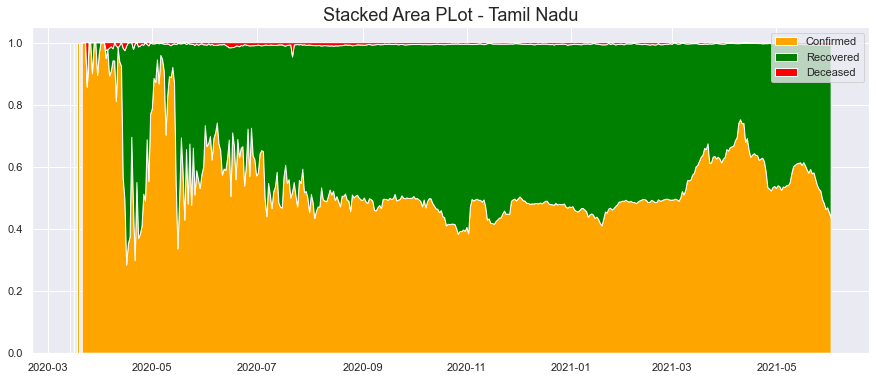

In [28]:
plot_stacked_area_by_state('tn');
plt.title("Stacked Area PLot - Tamil Nadu", fontsize= 18);

<ipython-input-27-a8092060fed3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_[state] = pd.to_numeric(df_[state])
<ipython-input-27-a8092060fed3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['date'] = pd.to_datetime(df_['date'])


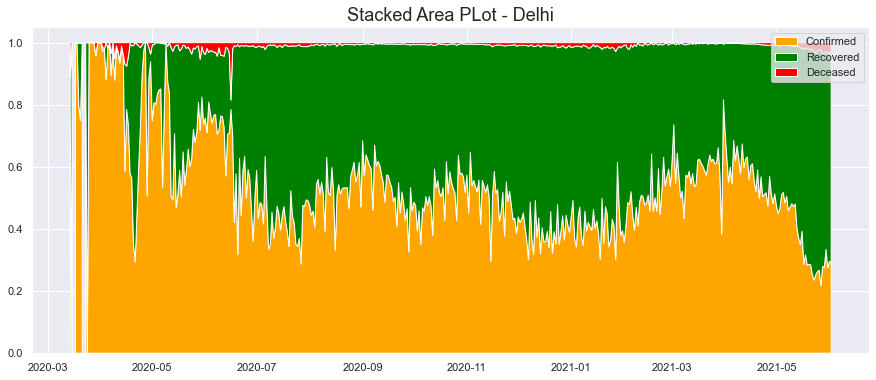

In [29]:
plot_stacked_area_by_state('dl')
plt.title("Stacked Area PLot - Delhi", fontsize= 18);

## Line plot

In [30]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Recovered,1,0,0,4,0,0,0,0


In [31]:
with open('data.json') as f:
  data = json.load(f)
data = data['states_daily']
df = pd.json_normalize(data)
df['date'] = pd.to_datetime(df['date']) 
df.drop('dateymd', axis=1, inplace=True)
df.set_index('date', inplace=True)

df_conf = df[df['status'] == 'Confirmed']
df_dec = df[df['status'] == 'Deceased']
df_rec = df[df['status'] == 'Recovered']

df_conf.drop('status', axis=1, inplace=True)
df_dec.drop('status', axis=1, inplace=True)
df_rec.drop('status', axis=1, inplace=True)

df_conf = df_conf.apply(pd.to_numeric)
df_dec = df_dec.apply(pd.to_numeric)
df_rec = df_rec.apply(pd.to_numeric)

df_conf = df_conf.rolling(7).mean()
df_dec = df_dec.rolling(7).mean()
df_rec = df_rec.rolling(7).mean()

df_conf.reset_index(inplace=True)
df_dec.reset_index(inplace=True)
df_rec.reset_index(inplace=True)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [32]:
df_conf.dropna(inplace= True)
df_dec.dropna(inplace= True)
df_rec.dropna(inplace= True)
df_conf.head()

,date,an,ap,ar,as,br,ch,ct,dd,dl,...,rj,sk,tg,tn,tr,tt,un,up,ut,wb
6,2020-03-20,0.0,0.428571,0.0,0.0,0.000000,0.714286,0.142857,0.0,2.857143,...,2.428571,0.0,2.714286,0.428571,0.0,36.571429,0.0,3.428571,0.428571,0.285714
7,2020-03-21,0.0,0.571429,0.0,0.0,0.000000,0.714286,0.142857,0.0,2.857143,...,3.000000,0.0,2.857143,0.714286,0.0,36.142857,0.0,2.285714,0.428571,0.571429
8,2020-03-22,0.0,0.714286,0.0,0.0,0.285714,0.857143,0.142857,0.0,2.857143,...,3.428571,0.0,3.428571,1.142857,0.0,41.857143,0.0,2.428571,0.428571,1.000000
9,2020-03-23,0.0,0.857143,0.0,0.0,0.428571,1.000000,0.142857,0.0,3.285714,...,4.000000,0.0,4.142857,1.571429,0.0,54.285714,0.0,2.714286,0.428571,1.000000
10,2020-03-24,0.0,1.000000,0.0,0.0,0.428571,1.000000,0.142857,0.0,3.142857,...,4.000000,0.0,4.571429,2.428571,0.0,61.857143,0.0,2.857143,0.428571,1.142857


Formulating the dataset

In [33]:
df_conf_ = pd.melt(df_conf, id_vars="date", 
              value_vars = list(df_conf.columns).remove("date"),
              var_name = "state", value_name = "confirmed")

df_dec_ = pd.melt(df_dec, id_vars="date", 
              value_vars = list(df_dec.columns).remove("date"),
              var_name = "state", value_name = "deceased")

df_rec_ = pd.melt(df_rec, id_vars="date", 
              value_vars = list(df_rec.columns).remove("date"),
              var_name = "state", value_name = "recovered")

In [34]:
df_conf_.head()

,date,state,confirmed
0,2020-03-20,an,0.0
1,2020-03-21,an,0.0
2,2020-03-22,an,0.0
3,2020-03-23,an,0.0
4,2020-03-24,an,0.0


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


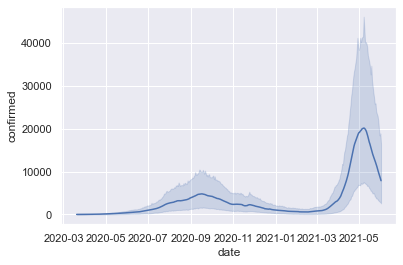

In [35]:
sns.lineplot('date', 'confirmed', data=df_conf_);

Focusing on few states to get better visualization and to prevent overlapping.

In [36]:
states = ['mh', 'tn', 'dl', 'wb', 'ka', 'gj']
df_conf_ = df_conf_[df_conf_.state.isin(states)]
df_dec_ = df_dec_[df_dec_.state.isin(states)]
df_rec_ = df_rec_[df_rec_.state.isin(states)]

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


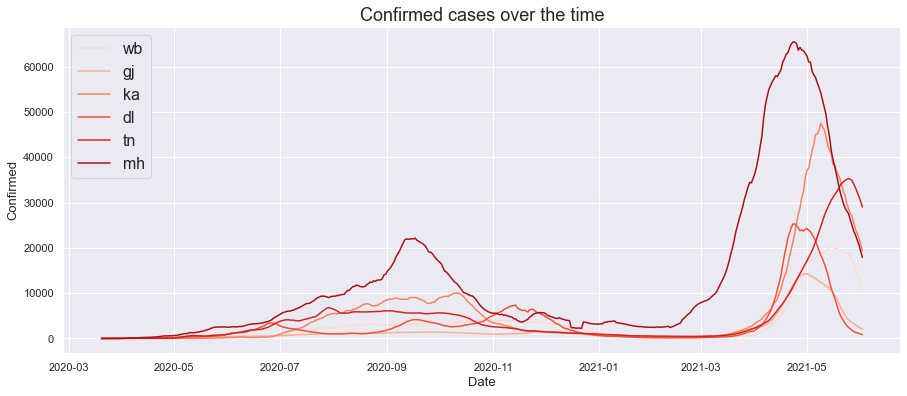

In [37]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.lineplot('date', 'confirmed', hue="state", data=df_conf_,
             palette='Reds', hue_order = ['wb', 'gj', 'ka', 'dl', 'tn', 'mh']);
plt.title('Confirmed cases over the time', fontsize= 18);
plt.xlabel('Date',fontsize= 13);
plt.ylabel('Confirmed', fontsize= 13);
plt.legend(loc = 'upper left', fontsize= 16);

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


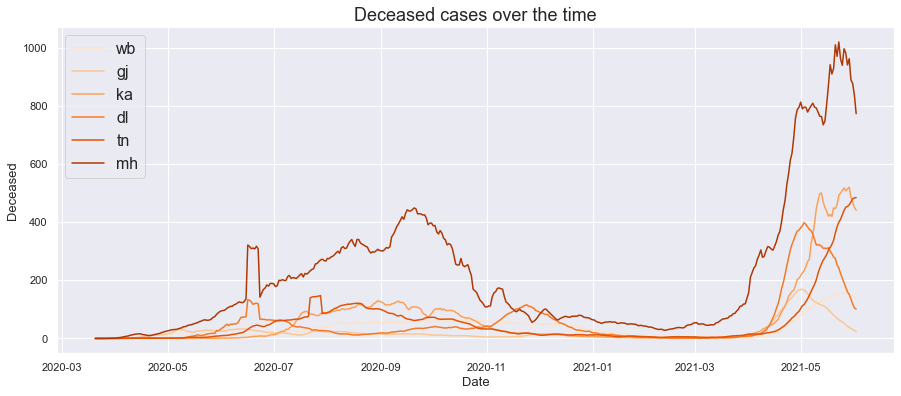

In [38]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.lineplot('date', 'deceased', hue="state", data=df_dec_,
             palette='Oranges', hue_order = ['wb', 'gj', 'ka', 'dl', 'tn', 'mh']);
plt.title('Deceased cases over the time', fontsize= 18);
plt.xlabel('Date',fontsize= 13);
plt.ylabel('Deceased', fontsize= 13);
plt.legend(loc = 'upper left', fontsize= 16);

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


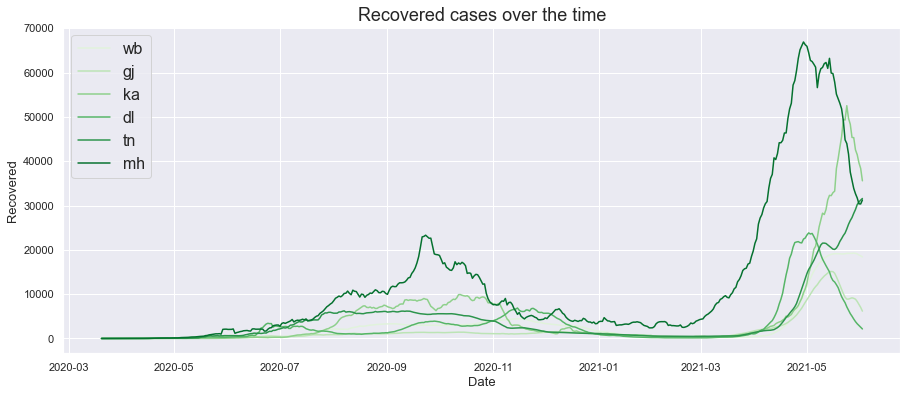

In [39]:
fig = plt.gcf();
fig.set_size_inches(15, 6);
sns.lineplot('date', 'recovered', hue="state", data=df_rec_,
             palette='Greens', hue_order = ['wb', 'gj', 'ka', 'dl', 'tn', 'mh']);
plt.title('Recovered cases over the time', fontsize= 18);
plt.xlabel('Date',fontsize= 13);
plt.ylabel('Recovered', fontsize= 13);
plt.legend(loc = 'upper left', fontsize= 16);

1. Overall it seems that Maharashtra state has highest Confirmed, Deceased and Recovery rate among all other state.
2. The graph is in increasing fashion w.r.t all states from March 2020 to May 2021 and onwards.